_Lizenz: Das folgende Lehrmaterial kann unter einer [CC-BY-SA 4.0](https://creativecommons.org/licenses/by/4.0/legalcode) Lizenz frei verwendet, verbreitet und modifiziert werden._   
 _Authoren: Jana Lasser (jana.lasser@ds.mpg.de)_  
 _Das Lehrmaterial wurde im Zuge des Projektes "Daten Lesen Lernen", gefördert vom Stifterverband und der Heinz Nixdorf Stiftung erstellt._

# Übung 06 - Wirtschaftswissenschaften: Histogramme und Zeitreihen
### Praktische Hinweise
$\rightarrow$ Übungen sind dafür gedacht, dass ihr sie euch daheim anseht und versucht, ein paar Aufgaben selbst zu lösen. In den Tutorien könnt ihr euch weiter mit dem Lösungen der Aufgaben beschäftigen und dabei Hilfe von den Tutor*innen bekommen.  

$\rightarrow$ Wenn ein Fehler auftritt:
1. Fehlermeldung _lesen_ und _verstehen_
2. Versuchen, selbst eine Lösung zu finden ($\rightarrow$ hier findet das Lernen statt!)
3. Das Problem googlen (Stichwort: Stackoverflow) oder den/die Nachbar*in fragen
4. Tutor*in fragen

$\rightarrow$ Unter <font color='green'>**HINWEIS**</font> werden Hinweise gegeben, die für die Lösung der Aufgabe hilfreich sind und oftmals auch weiterführende Informationen zur Aufgabe liefern.

$\rightarrow$ Mit **(Optional)** gekennzeichnete Übungsteile sind für besonders schnelle Menschen :-).

<a name="top"></a>Inhalt
---
Da die letzte Übung etwas lang war, wiederholen wir den Teil über die Histogramme aus der letzten Übung hier noch einmal. Außerdem wollen wir uns den Zeitlichen Verlauf verschiedener Größen (Streiks, Streiktage und streikende Arbeiter) für verschiedene Länder ansehen. 

Das Tutorial gliedert sich in
* [Histogramme](#histogramme)
* [Zeitreihen](#zeitreihen)

<a name="histogramme"></a>1. Histogramme
---
Im folgenden Abschnitt werden wir damit beginnen, die gewonnenen Informationen zu visualisieren. Eine sehr einfache Visualisierung ist das Histogramm, eine graphische Darstellung der Häufigkeit eines Merkmals. Zur Illustration erstellen wir eine kleine Visualisierung der Verteilung von Werten in einer Liste:

In [1]:
%matplotlib inline

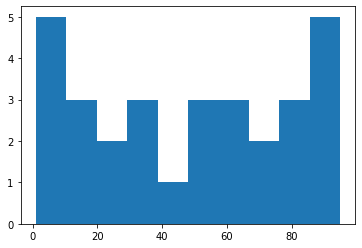

In [2]:
# eine Liste mit 30 Ganzzahlen, die z.B. das Alter von Personen in einer
# Gruppe darstellen können
alter = [37, 20, 84,  2, 11, 89, 52, 65, 90, 21, 30, 12, 17, 53, 62, 45, 37,
        3,  6, 64, 85,  6, 95, 73, 68, 55, 86, 83, 91,  1]

# für Visualisierungen benutzen wir die Blbiothek "matplotlib.pyplot"
import matplotlib.pyplot as plt

# Histogramme lassen sich einfach mit der Funktion plt.hist() erstellen
plt.hist(alter);

Visualisierungen sollten immer mit Achsenbeschriftungen versehen werden. Dafür verwenden wir die Funktionen ```plt.xlabel()``` und ```plt.ylabel```. Außerdem können wir der Abbildung mit ```plt.title()``` einen Titel geben. Mit verschiedenen optionalen Argumenten lässt sich das Verhalten von ```plt.hist()``` anpassen:
* ```bins``` ändert die Anzahl der Bins
* ```range``` ändert den dargestellten Bereich auf der x-Achse
* ```rwidth``` ändert die dargestellte bin-Weite 
* ```color``` ändert die Farbe
* ```alpha``` ändert den Alpha-Wert (Durchsichtigkeit) der dargestellten Balken.

Plot-Funktionen haben oftmals sehr viele optionale Argumente (auch "keyword arguments" genannt). Um herauszufinden, wass die jeweiligen Funktionen alles können, lohnt sich ein Blick in die [Dokumentation](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html). Außerdem sollte jede Darstellung *immer* mit Achsenbeschriftungen und eventuell einem Titel versehen werden:

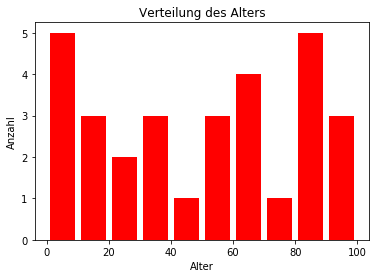

In [3]:
plt.hist(alter, color='red', rwidth=0.8, range=[0,100], bins=10, label='alter')
plt.xlabel('Alter')
plt.ylabel('Anzahl')
plt.title('Verteilung des Alters');

### Aufgaben
**A.** Erstelle ein Histogramm der Anzahl der Streiks im Jahr 2010.  <font color='green'>**HINWEIS:** Damit das funktioniert, musst du mit der Funktion ```dropna()``` alle ```NaN```-Werte entfernen.</font>   
**B.** Mache dich mit den unterschiedlichen Argumenten der Funktion ```plt.hist()``` vertraut, indem du verschiedene Werte und Kombinationen für die Daten ausprobierst. Finde Werte, die die Daten deiner Meinung nach gut und verständlich darstellen. Worauf kommt es dabei an? Versieh die Darstellung mit passenden Beschriftungen.  
**C.** Insbesondere das Argument ```bins``` verändert die Darstellung des Histogrammes sehr stark. Was kann schiefgehen, wenn ```bins``` zu niedrig oder zu hoch gewählt wird? Was ist eine gute Wahl für einen Datensatz?  
**D.** Visualisiere die Anzahl der Streiks im Jahr 1950 im selben Histogram. Kannst du eine Aussage über die Entwicklung des Streikverhaltens ableiten? <font color='green'>**HINWEIS:** Du kannst einfach in der selben Code-Zelle zwei mal hintereinander die Funktion ```plt.hist()``` (natürlich mit unterschiedlichen Daten) aufrufen, um die Daten übereinandergelegt darzustellen. Du kannst mit der Funktion ```plt.legend()``` eine Legende zur Abbildung hinzufügen. Damit das funktioniert, musst du den einzelen plot-Befehlen vorher ein entsprechendes ```label``` Argument mitgeben.</font> Was fällt dir auf? Worauf musst du achten, damit die beiden Histogramme vergleichbar sind?  
**E. (Optional)** Was hat es mit den beiden keyword arguments ```density``` und ```cumulative``` auf sich? Wie verändert sich das Histogram und wie kann die Darstellung dann interpretiert werden?

[Anfang](#top)

<a name="tortendiagramm"></a>2. Zeitreihen
---
Für die nachfolgenden Aufgaben ist es praktischer, die Daten im sog. "long Format" vorliegen zu haben. Dankenswerterweise liegen alle drei Datensätze zu Streiks bereits im Fong format vor (siehe zweites Sheet in der Excel-Datei). Wir können ein spezifisches Sheet der Excel-Datei  einlesen, indem wir der Funktion ```read_excel()``` das Argument ```sheet_name``` mitgeben: 

In [4]:
# lade den Datensatz
import pandas as pd

# Dateiname 
fname_streiks = 'NumberofLabourDisputes_Broad.xlsx'
# lade die Datei als pandas DataFrame
streiks = pd.read_excel("daten/" + fname_streiks, sheet_name='Data Long Format')
streiks.head()

,ccode,country.name,year,value
0,32,Argentina,1927,56
1,36,Australia,1927,441
2,40,Austria,1927,216
3,56,Belgium,1927,186
4,100,Bulgaria,1927,23


**A.** Was ist der Unterschied zwischen dem long Format und dem in der letzen Übung benutzen Datenformat? Kannst du erklären, warum das long Format praktischer zu handhaben sein kann?  

Als erstes wollen wir die Entwicklung der Streik-Anzahl über die Zeit untersuchen. Um das für ein spezifisches Land zu tun, müssen wir das DataFrame entsprechend filtern:

In [5]:
land = 'United Kingdom'
filter_streiks_land = streiks['country.name'] == land
streiks_land = streiks[filter_streiks_land]
streiks_land.head()

,ccode,country.name,year,value
29,826,United Kingdom,1927,308
61,826,United Kingdom,1928,302
94,826,United Kingdom,1929,431
127,826,United Kingdom,1930,422
160,826,United Kingdom,1931,420


Den Verlauf über die Zeit können wir mit Hilfe einer Zeitreihe visualisieren. Dafür benutzen wir die Funktion ```plot(x,y)``` der Funktion ```matplotlib.pyplot```, der wir die Jahreszahl als x-Wert und die Anzahl der Streiks als y-Wert übergeben:

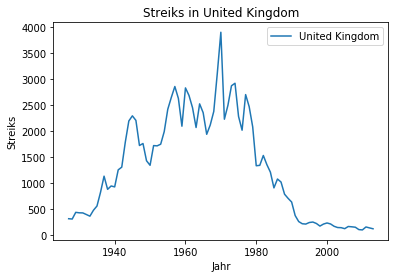

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(streiks_land['year'], streiks_land['value'], label=land)
plt.xlabel('Jahr')
plt.ylabel('Streiks')
plt.title('Streiks in {}'.format(land))
plt.legend()

**B.** Visualisiere den zeitlichen Verlauf der Anzahl der Streiks für verschiedene Länder in der selben Abbildung. Stelle sicher, dass die Abbildung Achsenbeschriftungen, einen Titel und eine Legende hat.  
**C.** Sieh dir insbesondere auch den zeitlichen Verlauf für Deutschland an. Was fällt dir auf? Wie lässt sich die Datenlage erklären? Was ließe sich unternehmen, um die fehlenden Daten zu ergänzen?  
**D.** Mit den Funktionen ```plt.xlim(xmin, xmax)``` und ```plt.ylim(ymin, ymax)``` lässt sich der in einer Abbildung dargestellte Bereich anpassen (ähnlich wie das ```range=[min, max]``` Argument in der Histogram-Funktion). Benutze diese Funktionen, um dir in der Darstellung aus Aufgabe **1.B** den Zeitraum um das Jahr 2000 genauer anzusehen.  
**E. (optional)** Auch die Funktion ```plot()``` hat viele verschiedene Argumente, mit denen man ihr Verhalten modifizieren kann. Mache dich mit der Dokumentation der Funktion vertraut und probiere ein paar Argumente aus, um die Abbildung zu verändern. Versuche insbesondere, die Darstellung der Linie zu verändern: aktuell ist die Linie einfach nur eine Linie. Möglich sind aber auch Punkte oder Striche. Was eignet sich für unsere Daten am besten und warum?  
**F. (optional)** Lade auch die Tabellen für die Anzahl der in den Streiks involvierten Arbeiter und die Anzahl der durch Streiks verlorenen Arbeitstage. Visualisiere alle drei Größen in der selben Abbildung für die USA.  <font color='green'>**HINWEIS:** Du kannst mit ```plt.yscale('log')``` die y-Achse auf logarithmische Darstellung umstellen.</font> Was passiert bei der logarithmischen Darstellung? Warum ist das in diesem Fall hilfreich?  
**G. (optional)** Um 1980 fällt die Anzahl der Streiks in den USA plötzlich massiv, die Anzahl der streikenden Arbeiter und der gestreikten Tage bleibt aber mehr oder weniger konstant. Wie kannst du dir das erklären?

[Anfang](#top)